Parts of this material are based on the Canadian Institute for Health Information Discharge Abstract Database Research Analytic Files (sampled from fiscal years 2016-17). However the analysis, conclusions, opinions and statements expressed herein are those of the author(s) and not those of the Canadian Institute for Health Information.

In [7]:
from dotenv import load_dotenv
load_dotenv()
import os
from dadpy.dadload import DadLoad
from dadpy.dadread import DadRead
from dadpy.dadembedding import DadEmbedding

# with the trailing slash
dl = DadLoad(os.getenv("DAD_PATH")) # clin_sample_spss.sav
dr = DadRead(dl.sample)
de = DadEmbedding(dl.sample)

<BarContainer object of 5 artists>

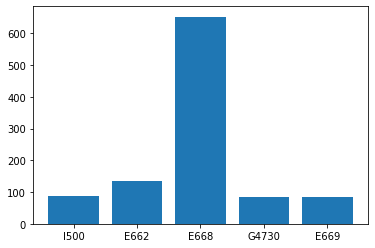

In [8]:
# Plot Comorbidities

import matplotlib.pyplot as plt
D = {k : v for k,v in dr.comorbidity('E66').items() if v > 50}

keys = D.keys()
values = D.values()

plt.bar(keys, values)

# Plot the comorbidities of E66 - Overweight and Obesity
# Note I50 - Heart failure in the list


<BarContainer object of 5 artists>

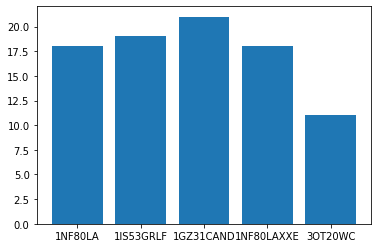

In [9]:
# Plot common interventions that are administered with a given one

D = {k : v for k,v in dr.interventions('1NF80').items() if v > 10}

keys = D.keys()
values = D.values()

plt.bar(keys, values)

# Plots what is usually done with 1NF80 - Partial gastrectomy for repair of gastric diverticulum
# Note 3OT20WC - CT of abdomen and pelvis

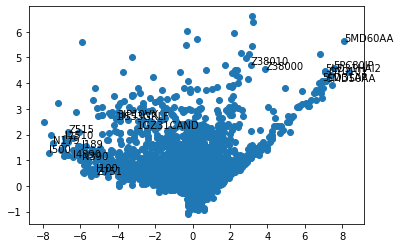

In [10]:
# Plot embeddings in a 2D space

from sklearn.decomposition import PCA
from matplotlib import pyplot
model = de.embedding()
# fit a 2d PCA model to the vectors
X = model.wv[model.wv.index_to_key]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = model.wv.index_to_key[:20]  # Plot 20 concepts as an example
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()
# SEE O68 - Labour and delivery complicated by fetal heart rate anomaly
# closer to O70 - second degree perineal laceration during delivery 


<BarContainer object of 10 artists>

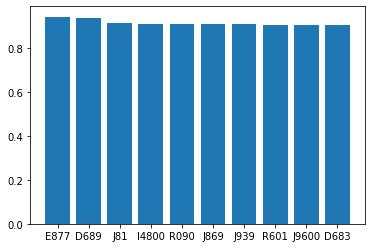

In [12]:
# Plot similarities using the embedding
D = dict(de.embedding().wv.most_similar_cosmul(['J90'])) # 
keys = D.keys()
values = D.values()

plt.bar(keys, values)

# Concepts similar to J90 - pleural effusion is closer to E877 - Fluid overload